# 📊 Analisis Produksi Padi di Pulau Sumatera
## 1. Problem Definition
Tujuan analisis ini adalah untuk memahami tren produksi padi di Pulau Sumatera, mengevaluasi faktor lingkungan yang mempengaruhi produksi, dan mengidentifikasi provinsi penghasil padi terbesar.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/portofolio_data/

'GAK2023_data report.pdf'   padi_sumatera


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load dataset
df = pd.read_csv('/content/drive/MyDrive/portofolio_data/padi_sumatera/Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()


,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


## 2. Data Overview (data preparation)

In [6]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


## 3. Tren Produksi Padi per Tahun (EDA)

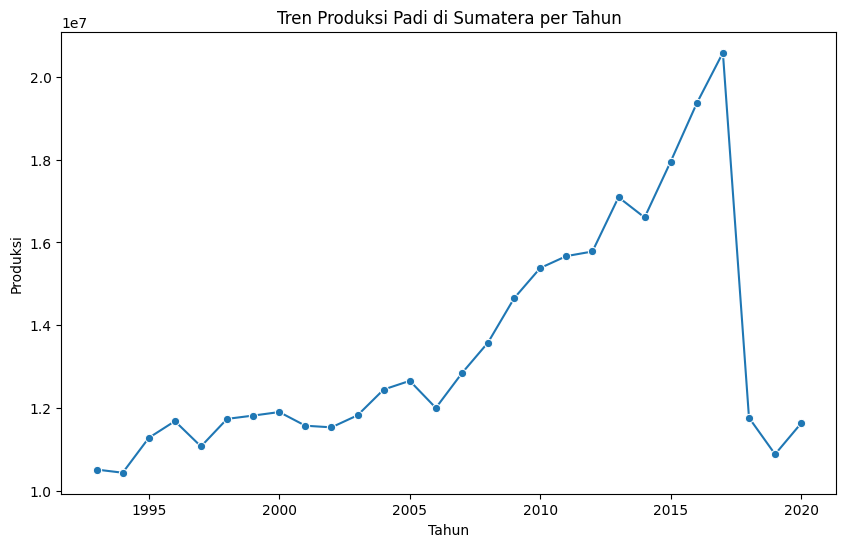

In [7]:

prod_per_tahun = df.groupby("Tahun")["Produksi"].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=prod_per_tahun.index, y=prod_per_tahun.values, marker="o")
plt.title("Tren Produksi Padi di Sumatera per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Produksi")
plt.show()


* Produksi padi di Sumatera meningkat hingga puncaknya tahun 2017 (±20,5 juta ton).

* Setelah itu terjadi penurunan tajam tahun 2018–2020 (turun hingga ±11,6 juta ton).

## 4. Top Provinsi Penghasil Padi (EDA)

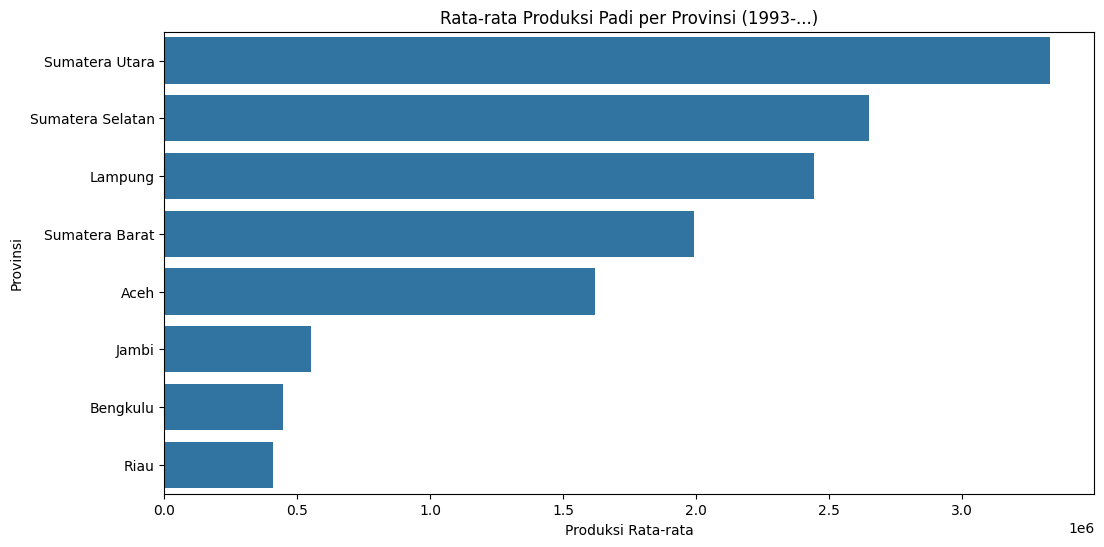

In [8]:

prod_per_prov = df.groupby("Provinsi")["Produksi"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=prod_per_prov.values, y=prod_per_prov.index)
plt.title("Rata-rata Produksi Padi per Provinsi (1993-...)")
plt.xlabel("Produksi Rata-rata")
plt.ylabel("Provinsi")
plt.show()


* Sumatera Utara → ±3,3 juta ton.

* Sumatera Selatan → ±2,65 juta ton.

* Lampung → ±2,44 juta ton.

* Tiga provinsi ini konsisten jadi pusat produksi terbesar di Sumatera.



## 5. Hubungan Produksi dan Luas Panen (EDA)

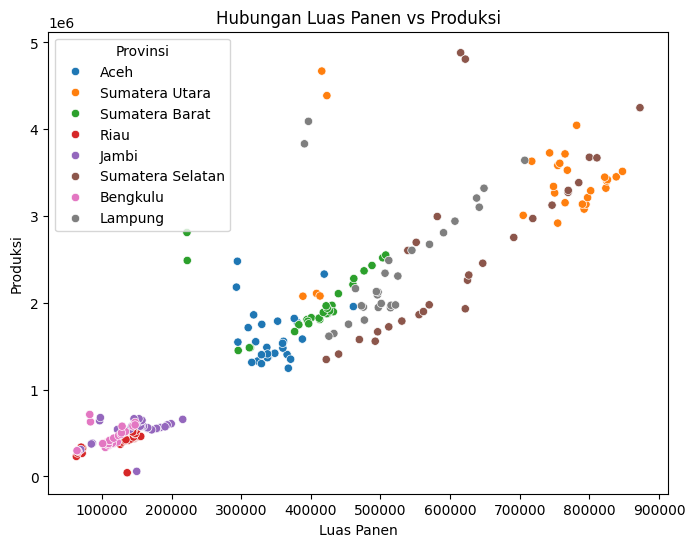

In [9]:

plt.figure(figsize=(8,6))
sns.scatterplot(x="Luas Panen", y="Produksi", hue="Provinsi", data=df)
plt.title("Hubungan Luas Panen vs Produksi")
plt.xlabel("Luas Panen")
plt.ylabel("Produksi")
plt.show()


* Sumatera Barat memiliki produktivitas tertinggi (±5,17 ton/ha), diikuti Sumatera Utara dan Lampung.

* Artinya, meski total produksi Sumatera Barat tidak sebesar Sumatera Utara, efisiensi lahannya paling tinggi.

## 6. Korelasi Faktor Lingkungan dengan Produksi (EDA)

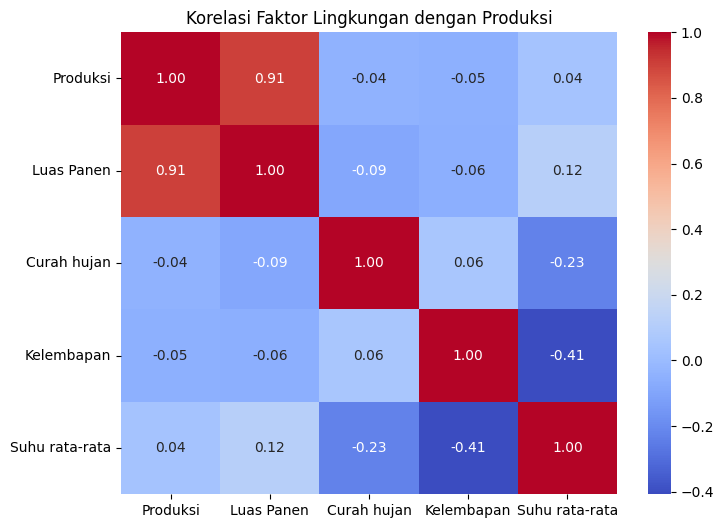

In [10]:

plt.figure(figsize=(8,6))
sns.heatmap(df[["Produksi","Luas Panen","Curah hujan","Kelembapan","Suhu rata-rata"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Faktor Lingkungan dengan Produksi")
plt.show()


* Luas Panen sangat berpengaruh pada produksi (r = 0,90 → korelasi kuat positif).

* Curah hujan, kelembapan, dan suhu rata-rata korelasinya lemah terhadap produksi (mendekati 0).

* Jadi produksi lebih ditentukan oleh luas lahan dibanding kondisi iklim.

## 7. Produktivitas (Produksi per Luas Panen) (EDA)

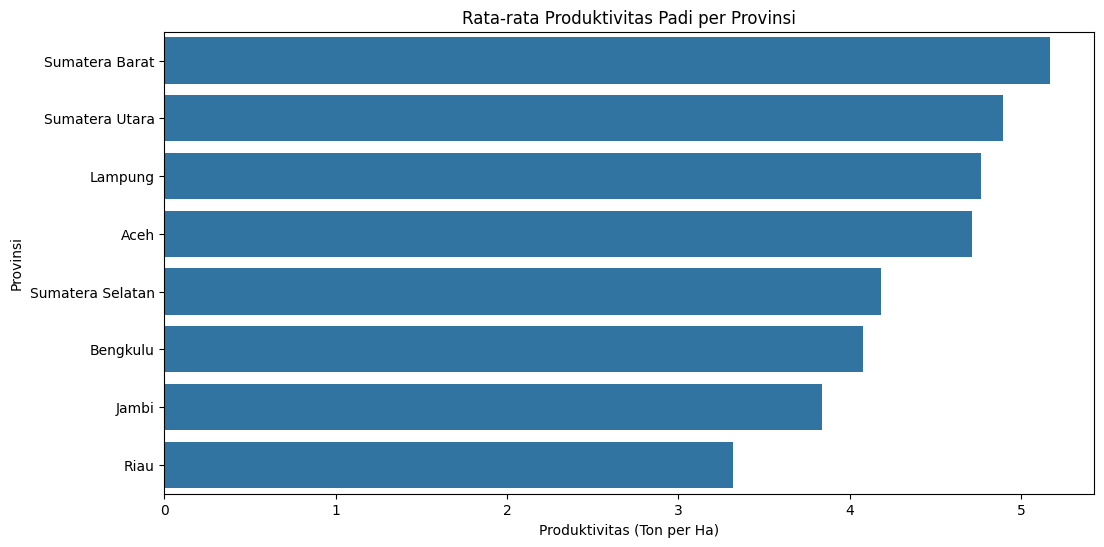

In [11]:

df["Produktivitas"] = df["Produksi"] / df["Luas Panen"]
prod_per_prov = df.groupby("Provinsi")["Produktivitas"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=prod_per_prov.values, y=prod_per_prov.index)
plt.title("Rata-rata Produktivitas Padi per Provinsi")
plt.xlabel("Produktivitas (Ton per Ha)")
plt.ylabel("Provinsi")
plt.show()


## 8. Conclusion & Insights


* Produksi padi di Sumatera tumbuh hingga 2017, tetapi mengalami penurunan drastis setelahnya.
* Sumatera Utara, Sumatera Selatan, dan Lampung merupakan pusat produksi utama, namun Sumatera Barat unggul dalam produktivitas per hektar.
* Faktor luas panen adalah penentu utama hasil produksi, sedangkan variabel iklim relatif kurang berpengaruh dalam data ini.
* **Rekomendasi:** kebijakan pertanian sebaiknya fokus pada efisiensi lahan dan peningkatan produktivitas (contoh: teknologi pertanian, varietas unggul) daripada hanya memperluas lahan.